# Apply grouped operations over multidimensional data

Reference notebook for the fifth task of the Climate Geospatial Analysis with Python and Xarray project on Coursera.

Instructor: Danilo Lessa Bernardineli (https://danlessa.github.io/)

---

- Welcome back! On this task, you are going to learn how to apply operations that involves grouping and resampling. This will greatly increase the scope of what you can do with categorical and temporal datasets, and it is a powerful tool to have.
- In order to start, let's open the task 5 notebook. Run everything as is.

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

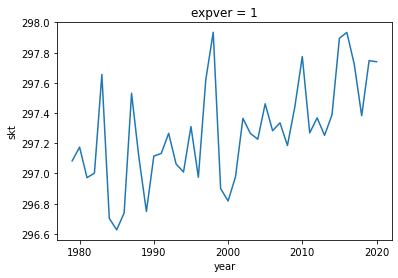

In [4]:
(ds.groupby(ds.time.dt.year)
   .mean(dim = ['time', 'latitude', 'longitude'])).skt.plot()

In [5]:
(ds.groupby(ds.time.dt.year)
   .mean(dim = ['time', 'latitude', 'longitude'])).skt

<xarray.DataArray 'skt' (year: 42)>
array([297.08368, 297.17456, 296.9722 , 297.0028 , 297.65518, 296.70334,
       296.6264 , 296.73883, 297.5306 , 297.1022 , 296.74857, 297.11533,
       297.13272, 297.26608, 297.06268, 297.0096 , 297.3107 , 296.9751 ,
       297.6209 , 297.93518, 296.90033, 296.81763, 296.97772, 297.36505,
       297.26578, 297.2267 , 297.46146, 297.2834 , 297.33542, 297.18515,
       297.44296, 297.77426, 297.26892, 297.36813, 297.25284, 297.38797,
       297.89557, 297.93402, 297.72333, 297.3828 , 297.74722, 297.73993],
      dtype=float32)
Coordinates:
    expver   int32 1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020

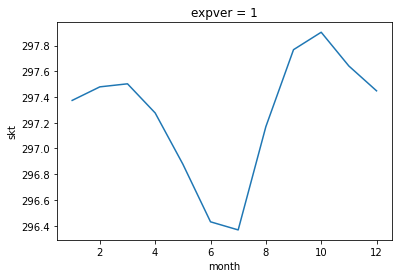

In [6]:
(ds.groupby(ds.time.dt.month)
   .mean(dim = ['time', 'latitude', 'longitude']).skt.plot())

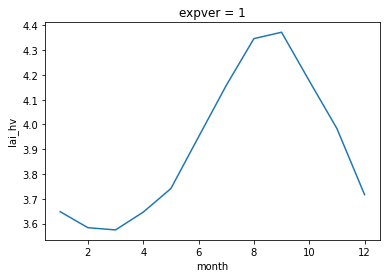

In [7]:
(ds.groupby(ds.time.dt.month)
   .mean(dim = ['time', 'latitude', 'longitude']).lai_hv.plot())

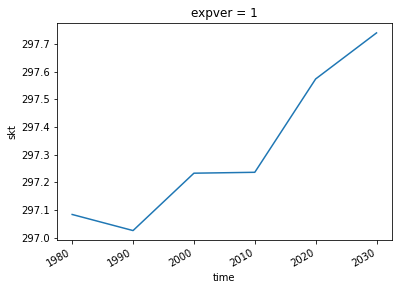

In [9]:
(ds.resample({'time' : '10y'})
   .mean(dim = ['time', 'latitude', 'longitude'])
   .skt.plot())